## Making figure A1

start by importing modules, data and priors

In [1]:
import arviz as az
import matplotlib.pylab as plt
import numpyro.distributions as dist

from makeCorner import *

In [2]:
cdf_file = "../data/RUNS/peak_run_no_delta_middle_z_until_0dot08.cdf"
data = az.from_netcdf(cdf_file)
samps = data.posterior.stack(draws=("chain", "draw"))

In [3]:
left = 15-60
right = 60
middle = right - (right - left) /2

new_priors = {
    "logR20":dist.Uniform(-2,1),
    "alpha_ref":dist.Normal(-2,3),
    "mu_m1":dist.Uniform(15,60),
    "mMin":dist.Uniform(5,15),
    "bq":dist.Normal(0,3),
    "alpha_z":dist.Normal(0,4),
    "beta_z":dist.Uniform(0,10),
    "zp": dist.Uniform(0,4),
    "fpeak": dist.Uniform(-6,0),
    "log_high_f_peak": dist.Uniform(-6,0),
    "width_f_peak": dist.Uniform(-1,1),
    "middle_z_f_peak": dist.Uniform(0,0.8),
    "high_mu": dist.Uniform(15, 60),
    "width_mu": dist.Uniform(-1,1),
    "middle_z_mu": dist.Uniform(0,0.8),
    "sig_m1": dist.Uniform(1.5,15),
    "high_sig": dist.Uniform(1.5,15),
    "width_sig": dist.Uniform(-1,1),
    "middle_z_sig": dist.Uniform(0,0.8),
    "delta_mu": [left, right, middle],
}

(array([ 21.,  56.,  87., 130., 175., 205., 147.,  91.,  56.,  32.]),
 array([-43.55281151, -33.42391028, -23.29500906, -13.16610784,
         -3.03720661,   7.09169461,  17.22059583,  27.34949706,
         37.47839828,  47.6072995 ,  57.73620073]),
 <BarContainer object of 10 artists>)

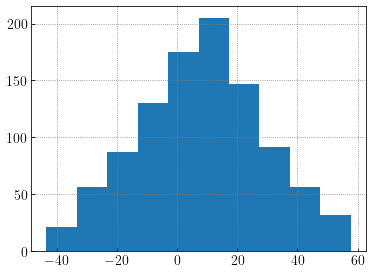

In [4]:
x = np.linspace(-100, 100, 1000)
plt.hist(np.random.triangular(left, middle, right, size = np.size(x)))

/home/max.lalleman/Zenodo_code/bbh_mass_distribution_redshift_variation_inference/figures/makeCorner.py:112: RuntimeWarning: invalid value encountered in log10
  pdf_values = np.log10(my_generator.triangular(priors[key][0], priors[key][2], priors[key][1], size = np.size(x)))


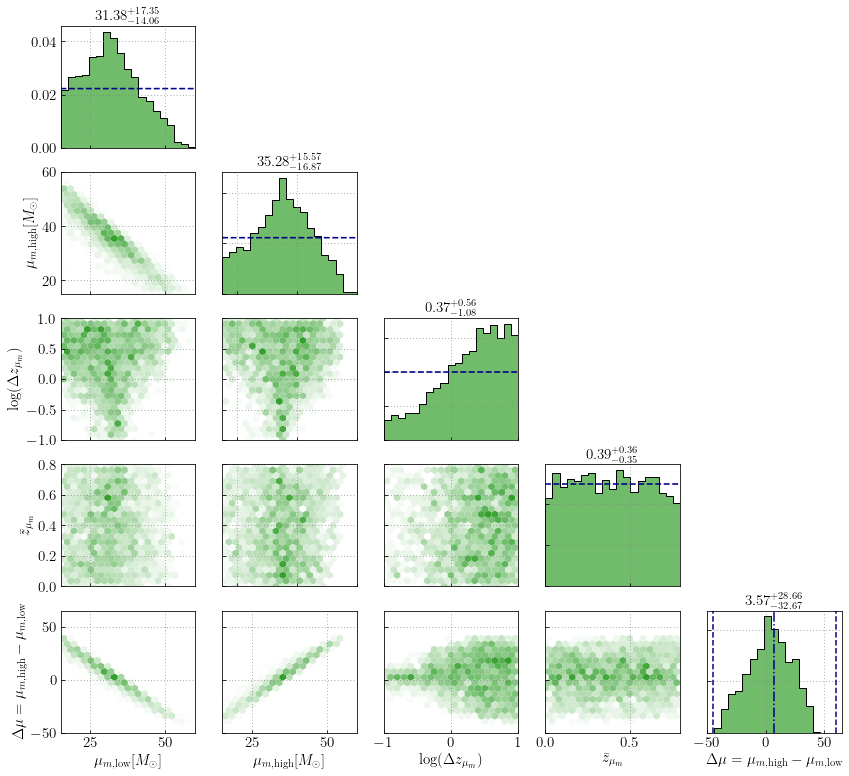

In [6]:
delta_mu = samps.high_mu - samps.mu_m1

fig = plt.figure(figsize=(14,13))
toPlot_no_GWB_mu = {
    "mu_m1":{"data":samps.mu_m1,"plot_bounds":(15, 60),"label":r"$\mu_{m, \rm low} [M_\odot]$"},
    "high_mu":{"data":samps.high_mu,"plot_bounds":(15, 60),"label":r"$\mu_{m, \rm high} [M_\odot]$"},
    "width_mu":{"data":samps.log_width_mu,"plot_bounds":(-1,1),"label":r"log($\Delta z_{\mu_{m}}$)"},
    "middle_z_mu":{"data":samps.middle_z_mu,"plot_bounds":(0,0.8),"label":r"$\bar z_{\mu_{m}}$"},
    "delta_mu":{"data":delta_mu, "plot_bounds":(-50, 65), "label":r"$\Delta \mu = \mu_{m, \rm high} - \mu_{m, \rm low}$"},
}
plot_corner(fig, toPlot_no_GWB_mu, "#33a02c", labelsize=15, priors = new_priors)
plt.savefig("PE_mu_peak.pdf", dpi=600, bbox_inches='tight')
plt.show()